In [2]:
import h5py
import numpy as np

with h5py.File('data/nogrid/DC4/taxi_data.h5', 'r') as f:
    taxi_pick = np.array(f['taxi_pick'])
    taxi_drop = np.array(f['taxi_drop'])

# B·ªè 1440 d√≤ng cu·ªëi (t·ª©c l√† ch·ªâ l·∫•y t·ª´ 0 ƒë·∫øn -1440)
taxi_pick_new = taxi_pick[:-1440]
taxi_drop_new = taxi_drop[:-1440]

with h5py.File('data/nogrid/DC4/taxi_data_7_8.h5', 'w') as f:
    f.create_dataset('taxi_pick', data=taxi_pick_new)
    f.create_dataset('taxi_drop', data=taxi_drop_new)


NYC Bike: T = 4368, N = 250


C:\Users\Admin\AppData\Local\Temp\ipykernel_26424\1118595894.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_total['hour'] = df_total.index.floor('H').hour


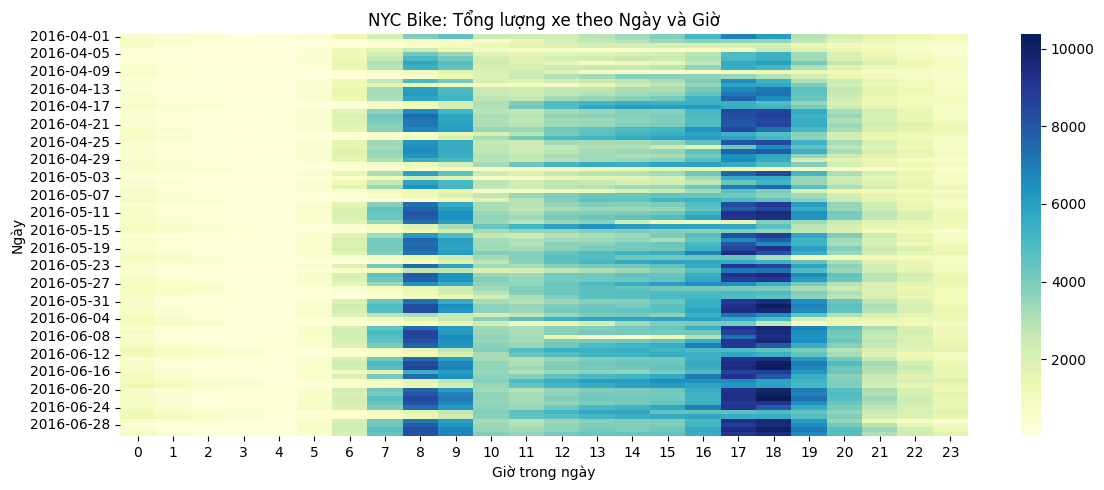

C:\Users\Admin\AppData\Local\Temp\ipykernel_26424\1118595894.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hour_zone['hour'] = df_hour_zone.index.floor('H').hour


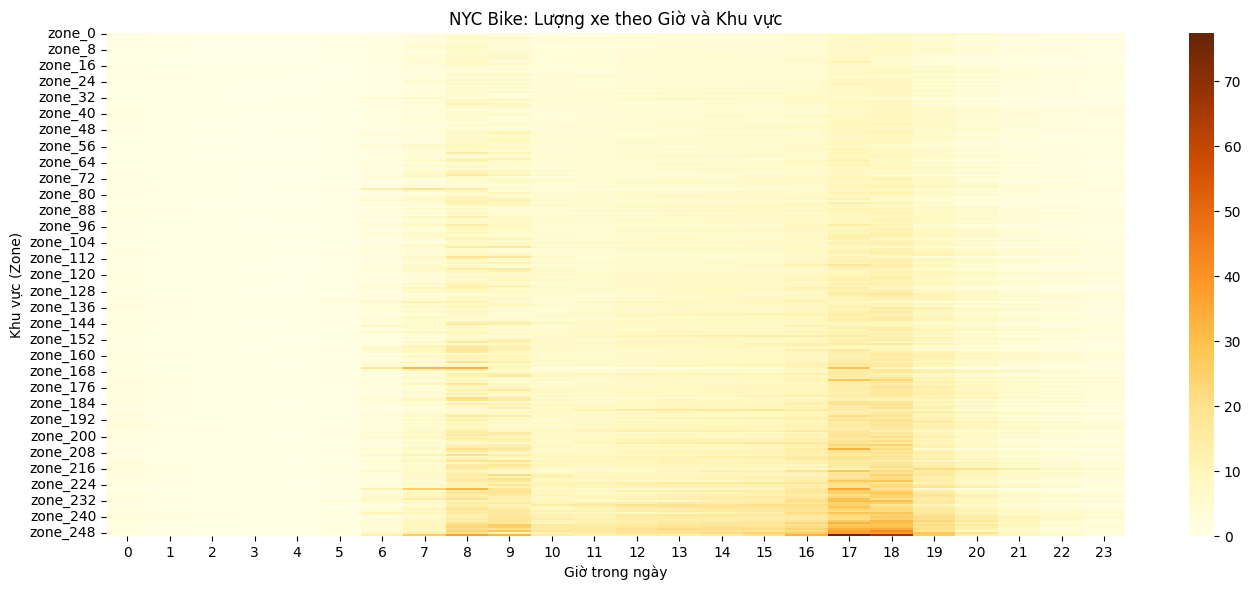

NYC Taxi: T = 4368, N = 266


C:\Users\Admin\AppData\Local\Temp\ipykernel_26424\1118595894.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_total['hour'] = df_total.index.floor('H').hour


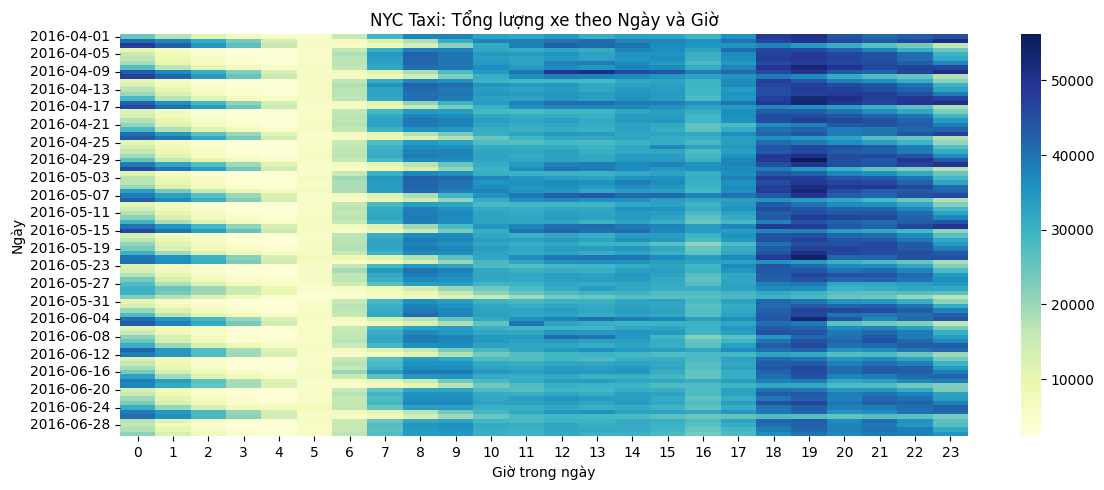

C:\Users\Admin\AppData\Local\Temp\ipykernel_26424\1118595894.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hour_zone['hour'] = df_hour_zone.index.floor('H').hour


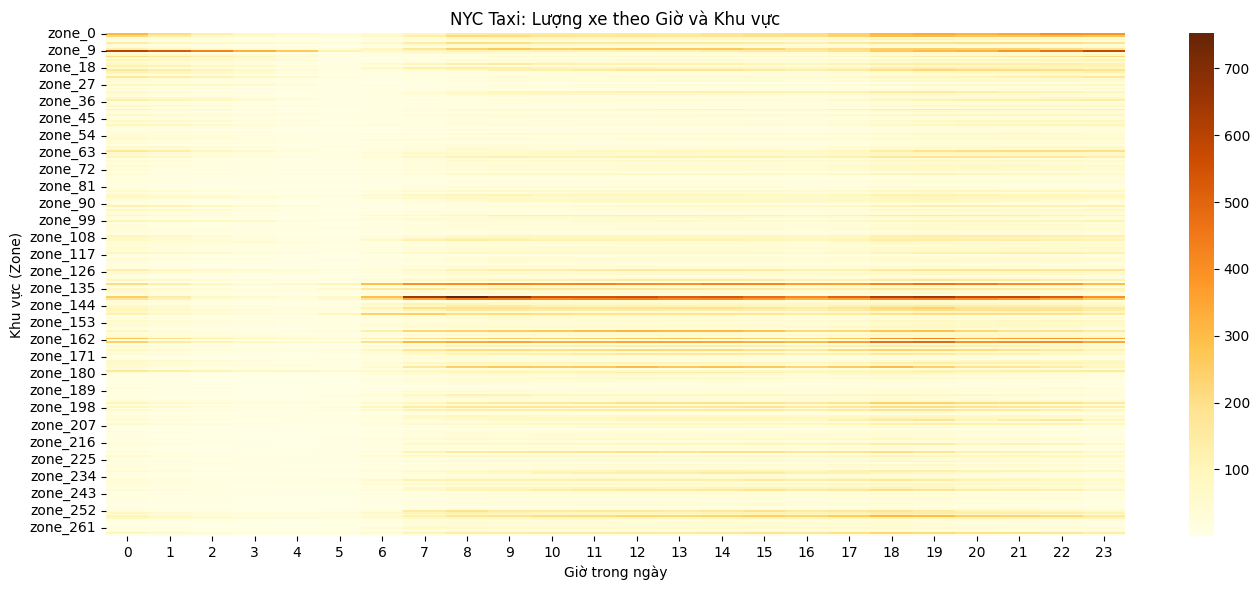

CHI Taxi: T = 4416, N = 77


C:\Users\Admin\AppData\Local\Temp\ipykernel_26424\1118595894.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_total['hour'] = df_total.index.floor('H').hour


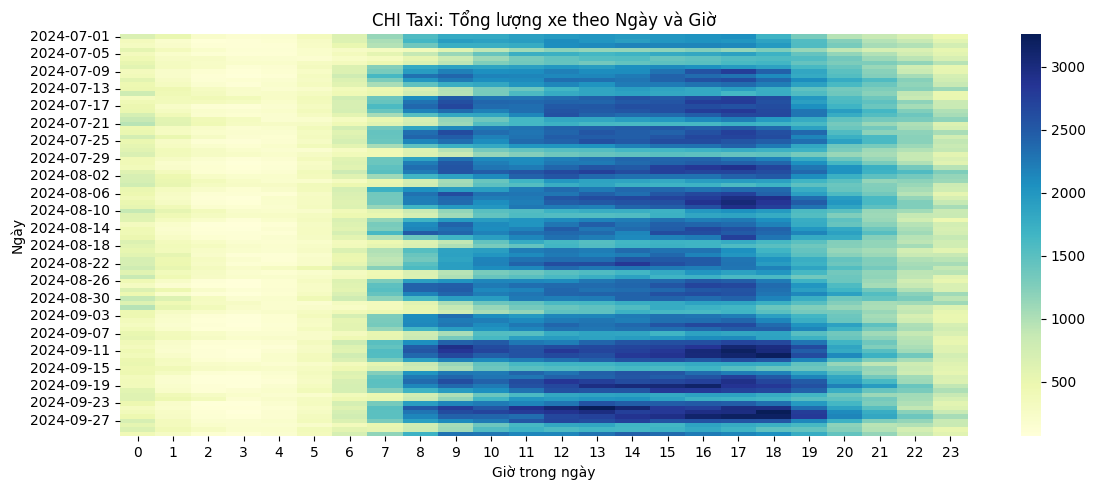

C:\Users\Admin\AppData\Local\Temp\ipykernel_26424\1118595894.py:31: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hour_zone['hour'] = df_hour_zone.index.floor('H').hour


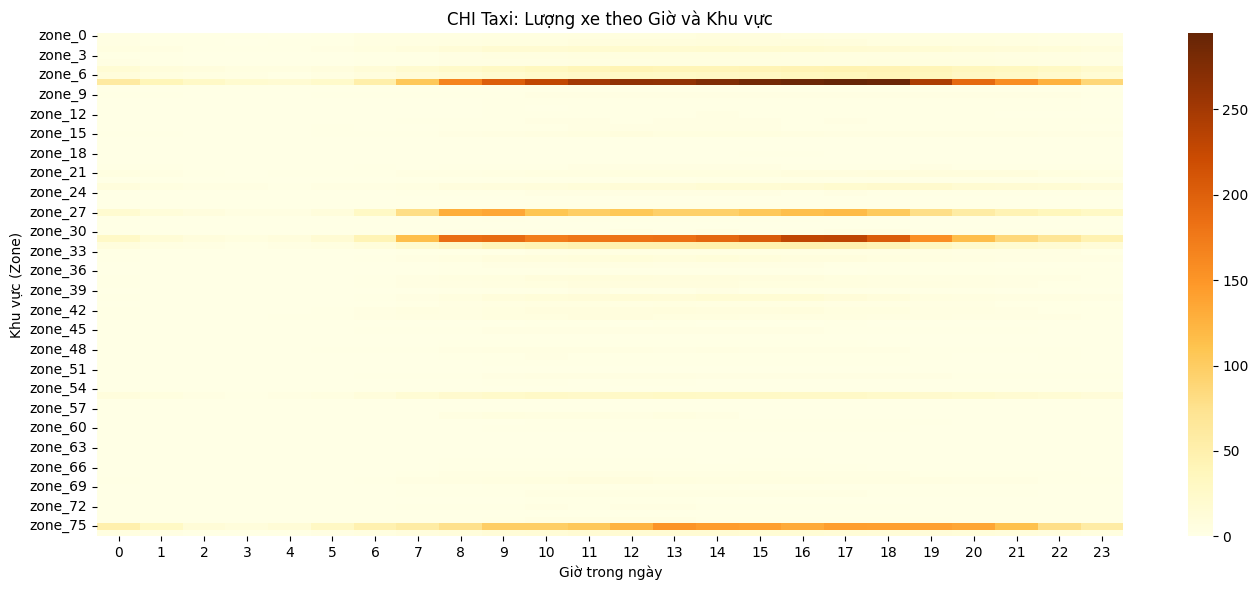

DC4 Taxi: T = 4416, N = 271


C:\Users\Admin\AppData\Local\Temp\ipykernel_26424\1118595894.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_total['hour'] = df_total.index.floor('H').hour


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import h5py

def plot_city_heatmaps(file_path, city_name, pick_key='bike_pick', drop_key='bike_drop', start_time_str='2016-04-01 00:00:00'):
    with h5py.File(file_path, 'r') as f:
        bike_pick = np.array(f[pick_key])
        bike_drop = np.array(f[drop_key])
    T, N = bike_pick.shape
    print(f"{city_name}: T = {T}, N = {N}")
    start_time = pd.Timestamp(start_time_str)
    time_index = pd.date_range(start=start_time, periods=T, freq='30min')
    df_pick = pd.DataFrame(bike_pick, index=time_index, columns=[f'zone_{i}' for i in range(N)])
    df_drop = pd.DataFrame(bike_drop, index=time_index, columns=[f'zone_{i}' for i in range(N)])
    df_total = df_pick + df_drop
    df_total['day'] = df_total.index.date
    df_total['hour'] = df_total.index.floor('H').hour

    heatmap_day_hour = df_total.groupby(['day', 'hour']).sum().sum(axis=1).unstack()
    plt.figure(figsize=(12, 5))
    sns.heatmap(heatmap_day_hour, cmap='YlGnBu')
    plt.title(f"{city_name}: T·ªïng l∆∞·ª£ng xe theo Ng√†y v√† Gi·ªù")
    plt.xlabel("Gi·ªù trong ng√†y")
    plt.ylabel("Ng√†y")
    plt.tight_layout()
    plt.show()

    df_hour_zone = df_total.drop(columns=['day', 'hour'])
    df_hour_zone['hour'] = df_hour_zone.index.floor('H').hour
    heatmap_zone_hour = df_hour_zone.groupby('hour').mean().T
    plt.figure(figsize=(14, 6))
    sns.heatmap(heatmap_zone_hour, cmap='YlOrBr')
    plt.title(f"{city_name}: L∆∞·ª£ng xe theo Gi·ªù v√† Khu v·ª±c")
    plt.xlabel("Gi·ªù trong ng√†y")
    plt.ylabel("Khu v·ª±c (Zone)")
    plt.tight_layout()
    plt.show()


    if city_name in ['DC Bike', 'Bay Bike']:
        zone_sums = df_hour_zone.drop(columns=['hour']).sum()
        max_zone = zone_sums.idxmax()
        print(f"B·ªè node ho·∫°t ƒë·ªông m·∫°nh nh·∫•t: {max_zone}")
        df_hour_zone = df_hour_zone.drop(columns=[max_zone])

        heatmap_zone_hour = df_hour_zone.groupby('hour').mean().T
        plt.figure(figsize=(14, 6))
        sns.heatmap(heatmap_zone_hour, cmap='YlOrBr')
        plt.title(f"{city_name}: L∆∞·ª£ng xe theo Gi·ªù v√† Khu v·ª±c (b·ªè node ho·∫°t ƒë·ªông m·∫°nh nh·∫•t)" if city_name in ['DC Bike', 'Bay Bike'] else f"{city_name}: L∆∞·ª£ng xe theo Gi·ªù v√† Khu v·ª±c")
        plt.xlabel("Gi·ªù trong ng√†y")
        plt.ylabel("Khu v·ª±c (Zone)")
        plt.tight_layout()
        plt.show()

city_files = [
    {'file': 'data/nogrid/NYC/bike_data.h5', 'city': 'NYC Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2016-04-01 00:00:00'},
    {'file': 'data/nogrid/NYC/taxi_data.h5', 'city': 'NYC Taxi', 'pick_key': 'taxi_pick', 'drop_key': 'taxi_drop', 'start': '2016-04-01 00:00:00'},
    {'file': 'data/nogrid/CHI/taxi_data.h5', 'city': 'CHI Taxi', 'pick_key': 'taxi_pick', 'drop_key': 'taxi_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/DC4/taxi_data.h5', 'city': 'DC4 Taxi', 'pick_key': 'taxi_pick', 'drop_key': 'taxi_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/DC4/taxi_data_7_8.h5', 'city': 'DC4 Taxi 7 8', 'pick_key': 'taxi_pick', 'drop_key': 'taxi_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/DC3/taxi_data.h5', 'city': 'DC3 Taxi', 'pick_key': 'taxi_pick', 'drop_key': 'taxi_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/DC2/taxi_data.h5', 'city': 'DC2 Taxi', 'pick_key': 'taxi_pick', 'drop_key': 'taxi_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/BOSTON/bike_data.h5', 'city': 'Boston Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/BOSTON2/bike_data.h5', 'city': 'Boston2 Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/BAY/bike_data.h5', 'city': 'Bay Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/BAY2/bike_data.h5', 'city': 'Bay2 Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/DC/bike_data.h5', 'city': 'DC Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2024-07-01 00:00:00'},
    {'file': 'data/nogrid/DC2/bike_data.h5', 'city': 'DC2 Bike', 'pick_key': 'bike_pick', 'drop_key': 'bike_drop', 'start': '2024-07-01 00:00:00'},
]

for info in city_files:
    plot_city_heatmaps(info['file'], info['city'], info['pick_key'], info['drop_key'], info['start'])

In [1]:
import pandas as pd

a = pd.read_csv("Taxi_Trips__2024-_.csv (2).csv")
a.info()

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6536512 entries, 0 to 6536511
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip ID                     object 
 1   Taxi ID                     object 
 2   Trip Start Timestamp        object 
 3   Trip End Timestamp          object 
 4   Trip Seconds                float64
 5   Trip Miles                  float64
 6   Pickup Census Tract         float64
 7   Dropoff Census Tract        float64
 8   Pickup Community Area       float64
 9   Dropoff Community Area      float64
 10  Fare                        float64
 11  Tips                        float64
 12  Tolls                       float64
 13  Extras                      float64
 14  Trip Total                  float64
 15  Payment Type                object 
 16  Company                     object 
 17  Pickup Centroid Latitude    float64
 18  Pickup Centroid Longitude   float64
 19  Pickup Centroid Locat

ƒêang ƒë·ªçc d·ªØ li·ªáu...
T·ªïng s·ªë b·∫£n ghi: 6,536,512
K√≠ch th∆∞·ªõc d·ªØ li·ªáu: (6536512, 23)
ƒêang x·ª≠ l√Ω timestamp...


C:\Users\Admin\AppData\Local\Temp\ipykernel_5804\1879847754.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'])



TH·ªêNG K√ä T·ªîNG QUAN
T·ªïng s·ªë th√°ng c√≥ d·ªØ li·ªáu: 17
T·ªïng s·ªë l∆∞·ª£t y√™u c·∫ßu: 6,536,512
Trung b√¨nh l∆∞·ª£t y√™u c·∫ßu/th√°ng: 384,501
T·ª´: 2024-01-01 ƒë·∫øn 2025-05-31

CHI TI·∫æT THEO T·ª™NG TH√ÅNG
Th√°ng        S·ªë l∆∞·ª£t y√™u c·∫ßu % c·ªßa t·ªïng  
----------------------------------------
2024-01      425,203         6.51        %
2024-02      440,013         6.73        %
2024-03      524,134         8.02        %
2024-04      546,369         8.36        %
2024-05      619,945         9.48        %
2024-06      608,266         9.31        %
2024-07      546,279         8.36        %
2024-08      563,732         8.62        %
2024-09      563,224         8.62        %
2024-10      598,969         9.16        %
2024-11      540,185         8.26        %
2024-12      492,143         7.53        %
2025-01      38,481          0.59        %
2025-02      25,604          0.39        %
2025-03      87              0.00        %
2025-04      3,847           0.06       

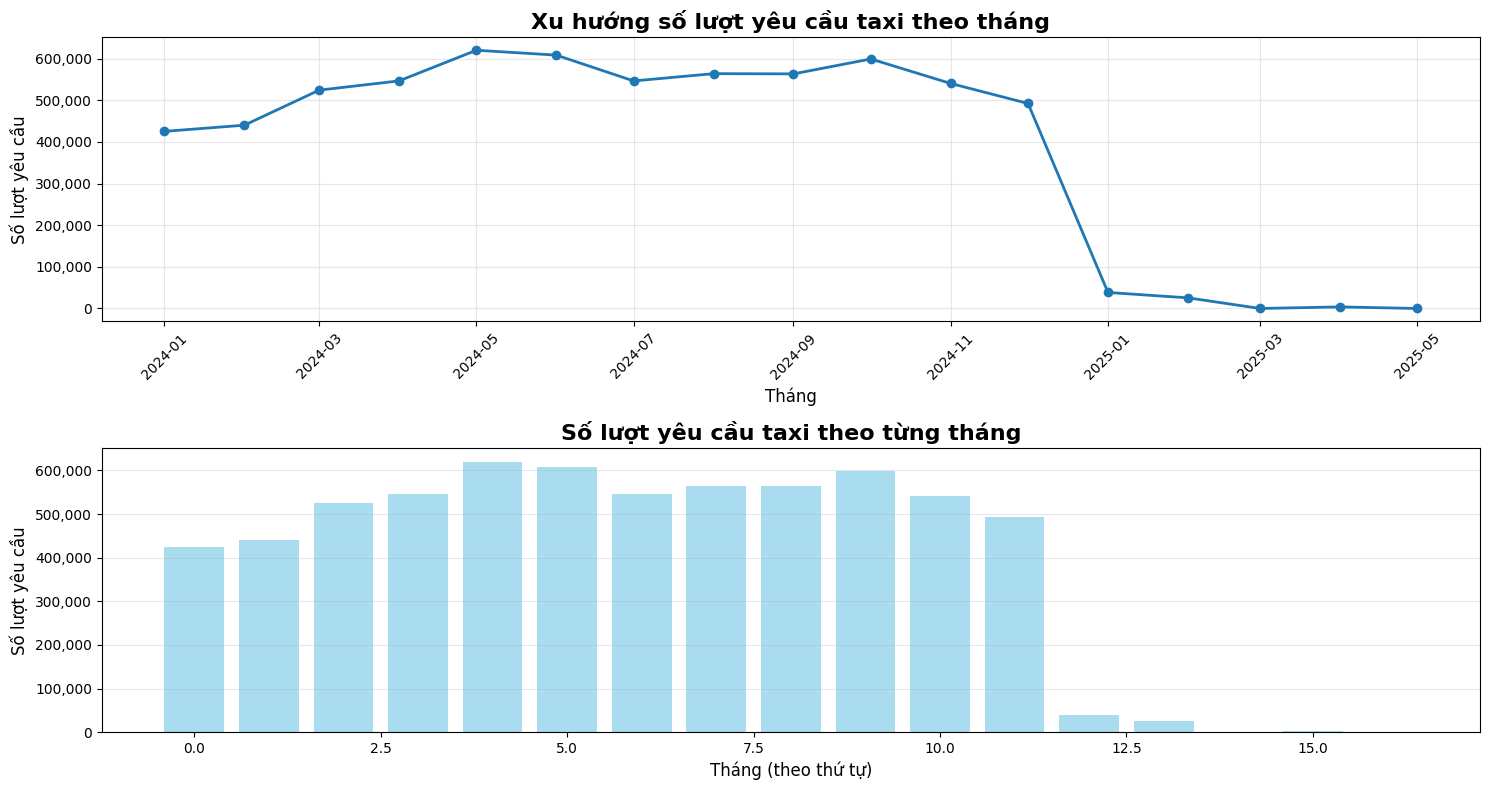

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_taxi_trips(csv_file_path):
    """
    Ph√¢n t√≠ch d·ªØ li·ªáu taxi trips ƒë·ªÉ ƒë·∫øm s·ªë th√°ng v√† s·ªë l∆∞·ª£t y√™u c·∫ßu trong m·ªói th√°ng
    """
    print("ƒêang ƒë·ªçc d·ªØ li·ªáu...")
    # ƒê·ªçc d·ªØ li·ªáu CSV
    df = pd.read_csv(csv_file_path)
    
    print(f"T·ªïng s·ªë b·∫£n ghi: {len(df):,}")
    print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu: {df.shape}")
    
    # Chuy·ªÉn ƒë·ªïi Trip Start Timestamp th√†nh datetime
    print("ƒêang x·ª≠ l√Ω timestamp...")
    df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'])
    
    # T·∫°o c·ªôt th√°ng-nƒÉm ƒë·ªÉ group by
    df['Year_Month'] = df['Trip Start Timestamp'].dt.to_period('M')
    
    # ƒê·∫øm s·ªë l∆∞·ª£t y√™u c·∫ßu theo t·ª´ng th√°ng
    monthly_counts = df.groupby('Year_Month').size().reset_index(name='Trip_Count')
    monthly_counts['Year_Month_Str'] = monthly_counts['Year_Month'].astype(str)
    
    # Th·ªëng k√™ t·ªïng quan
    total_months = len(monthly_counts)
    total_trips = len(df)
    avg_trips_per_month = total_trips / total_months
    
    print("\n" + "="*60)
    print("TH·ªêNG K√ä T·ªîNG QUAN")
    print("="*60)
    print(f"T·ªïng s·ªë th√°ng c√≥ d·ªØ li·ªáu: {total_months}")
    print(f"T·ªïng s·ªë l∆∞·ª£t y√™u c·∫ßu: {total_trips:,}")
    print(f"Trung b√¨nh l∆∞·ª£t y√™u c·∫ßu/th√°ng: {avg_trips_per_month:,.0f}")
    
    # Th·ªùi gian t·ª´ ƒë·∫ßu ƒë·∫øn cu·ªëi
    start_date = df['Trip Start Timestamp'].min()
    end_date = df['Trip Start Timestamp'].max()
    print(f"T·ª´: {start_date.strftime('%Y-%m-%d')} ƒë·∫øn {end_date.strftime('%Y-%m-%d')}")
    
    print("\n" + "="*60)
    print("CHI TI·∫æT THEO T·ª™NG TH√ÅNG")
    print("="*60)
    print(f"{'Th√°ng':<12} {'S·ªë l∆∞·ª£t y√™u c·∫ßu':<15} {'% c·ªßa t·ªïng':<12}")
    print("-" * 40)
    
    for _, row in monthly_counts.iterrows():
        percentage = (row['Trip_Count'] / total_trips) * 100
        print(f"{row['Year_Month_Str']:<12} {row['Trip_Count']:<15,} {percentage:<12.2f}%")
    
    # Th√°ng c√≥ nhi·ªÅu y√™u c·∫ßu nh·∫•t v√† √≠t nh·∫•t
    max_month = monthly_counts.loc[monthly_counts['Trip_Count'].idxmax()]
    min_month = monthly_counts.loc[monthly_counts['Trip_Count'].idxmin()]
    
    print("\n" + "="*60)
    print("TH·ªêNG K√ä N√ÇNG CAO")
    print("="*60)
    print(f"Th√°ng c√≥ nhi·ªÅu y√™u c·∫ßu nh·∫•t: {max_month['Year_Month_Str']} ({max_month['Trip_Count']:,} l∆∞·ª£t)")
    print(f"Th√°ng c√≥ √≠t y√™u c·∫ßu nh·∫•t: {min_month['Year_Month_Str']} ({min_month['Trip_Count']:,} l∆∞·ª£t)")
    print(f"Ch√™nh l·ªách: {max_month['Trip_Count'] - min_month['Trip_Count']:,} l∆∞·ª£t")
    
    # Th·ªëng k√™ theo nƒÉm
    df['Year'] = df['Trip Start Timestamp'].dt.year
    yearly_counts = df.groupby('Year').size()
    
    print(f"\nTh·ªëng k√™ theo nƒÉm:")
    for year, count in yearly_counts.items():
        print(f"NƒÉm {year}: {count:,} l∆∞·ª£t y√™u c·∫ßu")
    
    return monthly_counts, df

def plot_monthly_trends(monthly_counts):
    """
    V·∫Ω bi·ªÉu ƒë·ªì xu h∆∞·ªõng theo th√°ng
    """
    plt.figure(figsize=(15, 8))
    
    # Chuy·ªÉn ƒë·ªïi ƒë·ªÉ c√≥ th·ªÉ plot
    monthly_counts['Date'] = pd.to_datetime(monthly_counts['Year_Month'].astype(str))
    
    plt.subplot(2, 1, 1)
    plt.plot(monthly_counts['Date'], monthly_counts['Trip_Count'], marker='o', linewidth=2, markersize=6)
    plt.title('Xu h∆∞·ªõng s·ªë l∆∞·ª£t y√™u c·∫ßu taxi theo th√°ng', fontsize=16, fontweight='bold')
    plt.xlabel('Th√°ng', fontsize=12)
    plt.ylabel('S·ªë l∆∞·ª£t y√™u c·∫ßu', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # Format y-axis v·ªõi d·∫•u ph·∫©y
    ax = plt.gca()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    plt.subplot(2, 1, 2)
    plt.bar(range(len(monthly_counts)), monthly_counts['Trip_Count'], alpha=0.7, color='skyblue')
    plt.title('S·ªë l∆∞·ª£t y√™u c·∫ßu taxi theo t·ª´ng th√°ng', fontsize=16, fontweight='bold')
    plt.xlabel('Th√°ng (theo th·ª© t·ª±)', fontsize=12)
    plt.ylabel('S·ªë l∆∞·ª£t y√™u c·∫ßu', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Format y-axis v·ªõi d·∫•u ph·∫©y
    ax = plt.gca()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # ƒê∆∞·ªùng d·∫´n ƒë·∫øn file CSV
    csv_file = "Taxi_Trips__2024-_.csv (2).csv"
    
    try:
        monthly_data, df = analyze_taxi_trips(csv_file)
        
        # V·∫Ω bi·ªÉu ƒë·ªì
        plot_monthly_trends(monthly_data)
        
        # # L∆∞u k·∫øt qu·∫£ ra file
        # monthly_data.to_csv("monthly_taxi_stats.csv", index=False)
        # print(f"\nƒê√£ l∆∞u th·ªëng k√™ th√°ng v√†o file: monthly_taxi_stats.csv")
        
    except FileNotFoundError:
        print(f"Kh√¥ng t√¨m th·∫•y file: {csv_file}")
        print("Vui l√≤ng ki·ªÉm tra ƒë∆∞·ªùng d·∫´n file.")
    except Exception as e:
        print(f"C√≥ l·ªói x·∫£y ra: {str(e)}")


In [ ]:
import pandas as pd
import os
from datetime import datetime

def extract_monthly_data(csv_file_path, output_dir="monthly_data"):
    """
    L·ªçc v√† l∆∞u d·ªØ li·ªáu taxi theo th√°ng 7, 8, 9 nƒÉm 2024 th√†nh c√°c file ri√™ng
    """
    print("ƒêang ƒë·ªçc d·ªØ li·ªáu...")
    # ƒê·ªçc d·ªØ li·ªáu CSV
    df = pd.read_csv(csv_file_path)
    
    print(f"T·ªïng s·ªë b·∫£n ghi: {len(df):,}")
    
    # Chuy·ªÉn ƒë·ªïi Trip Start Timestamp th√†nh datetime
    print("ƒêang x·ª≠ l√Ω timestamp...")
    df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'])
    
    # T·∫°o th∆∞ m·ª•c output n·∫øu ch∆∞a c√≥
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"ƒê√£ t·∫°o th∆∞ m·ª•c: {output_dir}")
    
    # L·ªçc theo t·ª´ng th√°ng v√† l∆∞u file
    months = [5, 6, 7]  # Th√°ng 7, 8, 9
    year = 2024
    
    total_extracted = 0
    
    for month in months:
        print(f"\nƒêang x·ª≠ l√Ω th√°ng {month}/{year}...")
        
        # L·ªçc d·ªØ li·ªáu theo th√°ng v√† nƒÉm
        monthly_data = df[
            (df['Trip Start Timestamp'].dt.year == year) & 
            (df['Trip Start Timestamp'].dt.month == month)
        ]
        
        if len(monthly_data) > 0:
            # T√™n file output
            output_file = f"{output_dir}/taxi_trips_{year}_{month:02d}.csv"
            
            # L∆∞u file
            monthly_data.to_csv(output_file, index=False)
            
            print(f"‚úÖ ƒê√£ l∆∞u {len(monthly_data):,} b·∫£n ghi v√†o file: {output_file}")
            print(f"   T·ª´: {monthly_data['Trip Start Timestamp'].min()}")
            print(f"   ƒê·∫øn: {monthly_data['Trip Start Timestamp'].max()}")
            
            total_extracted += len(monthly_data)
        else:
            print(f"‚ùå Kh√¥ng c√≥ d·ªØ li·ªáu cho th√°ng {month}/{year}")
    
    print(f"\n{'='*60}")
    print(f"T·ªîNG K·∫æT")
    print(f"{'='*60}")
    print(f"T·ªïng s·ªë b·∫£n ghi ƒë√£ l·ªçc: {total_extracted:,}")
    print(f"T·ª∑ l·ªá d·ªØ li·ªáu l·ªçc ƒë∆∞·ª£c: {(total_extracted/len(df)*100):.2f}%")
    
    return total_extracted

# Ch·∫°y ph√¢n t√≠ch nhanh tr∆∞·ªõc
csv_file = "Taxi_Trips__2024-_.csv (2).csv"

# L·ªçc v√† l∆∞u d·ªØ li·ªáu theo th√°ng
print(f"\n{'='*60}")
extract_monthly_data(csv_file)


ƒêang ƒë·ªçc d·ªØ li·ªáu...
T·ªïng s·ªë b·∫£n ghi: 6,536,512
ƒêang x·ª≠ l√Ω timestamp...


C:\Users\Admin\AppData\Local\Temp\ipykernel_5804\623081224.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'])


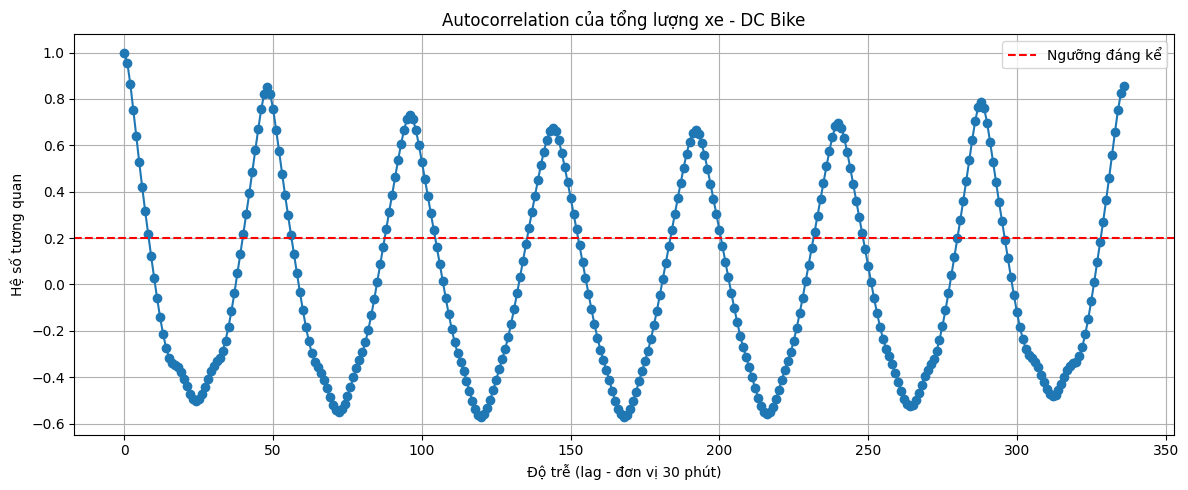

üü¢ DC Bike c√≥ d·∫•u hi·ªáu ph·ª• thu·ªôc d√†i h·∫°n ·ªü c√°c ƒë·ªô tr·ªÖ: [49, 50, 51, 52, 53]...


In [6]:
from statsmodels.tsa.stattools import acf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import h5py
def check_long_term_dependency(file_path, city_name, pick_key='bike_pick', drop_key='bike_drop', start_time_str='2016-04-01 00:00:00', max_lag=336):
    with h5py.File(file_path, 'r') as f:
        bike_pick = np.array(f[pick_key])
        bike_drop = np.array(f[drop_key])
    T, N = bike_pick.shape
    start_time = pd.Timestamp(start_time_str)
    time_index = pd.date_range(start=start_time, periods=T, freq='30min')
    df_pick = pd.DataFrame(bike_pick, index=time_index)
    df_drop = pd.DataFrame(bike_drop, index=time_index)

    # T·ªïng l∆∞·ª£ng pick + drop t·∫°i m·ªói th·ªùi ƒëi·ªÉm (tr√™n to√†n th√†nh ph·ªë)
    total_volume = df_pick.sum(axis=1) + df_drop.sum(axis=1)

    # T√≠nh h·ªá s·ªë t∆∞∆°ng quan t·ª± ƒë·ªông (autocorrelation)
    autocorr = acf(total_volume, nlags=max_lag, fft=True)

    # V·∫Ω bi·ªÉu ƒë·ªì
    plt.figure(figsize=(12, 5))
    plt.plot(range(max_lag + 1), autocorr, marker='o')
    plt.title(f'Autocorrelation c·ªßa t·ªïng l∆∞·ª£ng xe - {city_name}')
    plt.xlabel('ƒê·ªô tr·ªÖ (lag - ƒë∆°n v·ªã 30 ph√∫t)')
    plt.ylabel('H·ªá s·ªë t∆∞∆°ng quan')
    plt.grid(True)
    plt.axhline(y=0.2, color='r', linestyle='--', label='Ng∆∞·ª°ng ƒë√°ng k·ªÉ')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Ph√°t hi·ªán ph·ª• thu·ªôc d√†i h·∫°n n·∫øu autocorrelation v·∫´n cao t·∫°i lag l·ªõn
    significant_lags = [lag for lag, corr in enumerate(autocorr) if lag > 48 and corr > 0.2]
    if significant_lags:
        print(f"üü¢ {city_name} c√≥ d·∫•u hi·ªáu ph·ª• thu·ªôc d√†i h·∫°n ·ªü c√°c ƒë·ªô tr·ªÖ: {significant_lags[:5]}...")
    else:
        print(f"üîµ {city_name} kh√¥ng c√≥ d·∫•u hi·ªáu r√µ r·ªát c·ªßa ph·ª• thu·ªôc d√†i h·∫°n.")

# V√≠ d·ª•: ki·ªÉm tra v·ªõi 1 th√†nh ph·ªë
check_long_term_dependency(
    file_path='data/nogrid/DC/bike_data.h5',
    city_name='DC Bike',
    pick_key='bike_pick',
    drop_key='bike_drop',
    start_time_str='2024-07-01 00:00:00',
    max_lag=336  # t∆∞∆°ng ƒë∆∞∆°ng 7 ng√†y n·∫øu m·ªói step l√† 30 ph√∫t
)


In [4]:
import numpy as np

def check_data_shape(dataset_path):
    """Ki·ªÉm tra shape c·ªßa d·ªØ li·ªáu"""
    for split in ['train', 'val', 'test']:
        data = np.load(f"{dataset_path}/{split}.npz")
        print(f"=== {split.upper()} DATA ===")
        print(f"X shape: {data['x'].shape}")  # (samples, timesteps, nodes, features)
        print(f"Y shape: {data['y'].shape}")
        print(f"Timesteps per sample: {data['x'].shape[1]}")
        print()

# Ch·∫°y ƒë·ªÉ check
check_data_shape("STIDGCN/data/NYC/bike_data")

=== TRAIN DATA ===
X shape: (3001, 12, 250, 2)
Y shape: (3001, 12, 250, 2)
Timesteps per sample: 12

=== VAL DATA ===
X shape: (672, 12, 250, 2)
Y shape: (672, 12, 250, 2)
Timesteps per sample: 12

=== TEST DATA ===
X shape: (672, 12, 250, 2)
Y shape: (672, 12, 250, 2)
Timesteps per sample: 12



In [8]:
check_data_shape("STIDGCN/data/bike_drop")

=== TRAIN DATA ===


X shape: (2606, 12, 250, 3)
Y shape: (2606, 12, 250, 1)
Timesteps per sample: 12

=== VAL DATA ===
X shape: (870, 12, 250, 3)
Y shape: (870, 12, 250, 1)
Timesteps per sample: 12

=== TEST DATA ===
X shape: (869, 12, 250, 3)
Y shape: (869, 12, 250, 1)
Timesteps per sample: 12



üîç Ph√¢n t√≠ch dataset: STIDGCN/data/bike_drop

üìä === TRAIN DATA ===
X shape: (2606, 12, 250, 3)
Y shape: (2606, 12, 250, 1)

üìà Chi ti·∫øt dimensions:
  Samples (s·ªë sequences): 2606
  Timesteps (c·ª≠a s·ªï th·ªùi gian): 12
  Nodes (s·ªë ƒëi·ªÉm/stations): 250
  X Features: 3
  Y Features: 1

üî¨ Ph√¢n t√≠ch features c·ªßa X:
  Feature 0: min=0.0000, max=71.0000, mean=2.4513
    ‚Üí C√≥ th·ªÉ l√† traffic volume/demand data
  Feature 1: min=0.0000, max=0.9792, mean=0.4883
    ‚Üí C√≥ th·ªÉ l√† normalized time feature
  Feature 2: min=0.0000, max=6.0000, mean=2.9292
    ‚Üí C√≥ th·ªÉ l√† hour of day (0-23)

üéØ Ph√¢n t√≠ch features c·ªßa Y:
  Feature 0: min=0.0000, max=71.0000, mean=2.4672
    ‚Üí Target variable (predicted demand)

üìã Sample data (first sequence, first node):
  X[0, :, 0, :] = 
[[0.         0.         0.        ]
 [0.         0.02083333 0.        ]
 [0.         0.04166667 0.        ]
 [0.         0.0625     0.        ]
 [0.         0.08333333 0.        ]
 [

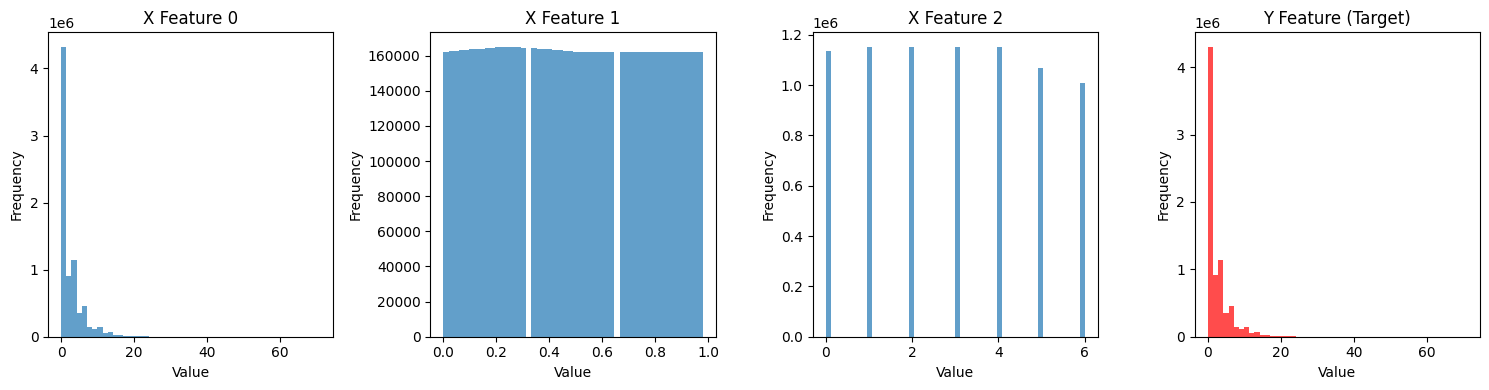

üîÑ So s√°nh datasets:
üìä Bike Drop Dataset:
  X: (2606, 12, 250, 3), Y: (2606, 12, 250, 1)
üìä Combined Dataset:
  X: (3001, 12, 250, 2), Y: (3001, 12, 250, 2)

üîç Ph√¢n t√≠ch features:

üü¢ Bike Drop - X features:
  Feature 0: min=0.0000, max=71.0000
  Feature 1: min=0.0000, max=0.9792
  Feature 2: min=0.0000, max=6.0000

üîµ Combined - X features:
  Feature 0: min=0.0000, max=96.0000
  Feature 1: min=0.0000, max=71.0000


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_data_dimensions(dataset_path):
    """
    Ph√¢n t√≠ch chi ti·∫øt c√°c chi·ªÅu c·ªßa d·ªØ li·ªáu
    """
    print(f"üîç Ph√¢n t√≠ch dataset: {dataset_path}")
    print("="*60)
    
    for split in ['train', 'val', 'test']:
        print(f"\nüìä === {split.upper()} DATA ===")
        data = np.load(f"{dataset_path}/{split}.npz")
        
        x_data = data['x']  # Shape: (samples, timesteps, nodes, features)
        y_data = data['y']  # Shape: (samples, timesteps, nodes, features)
        
        print(f"X shape: {x_data.shape}")
        print(f"Y shape: {y_data.shape}")
        
        # Ph√¢n t√≠ch t·ª´ng chi·ªÅu
        samples, timesteps, nodes, x_features = x_data.shape
        _, _, _, y_features = y_data.shape
        
        print(f"\nüìà Chi ti·∫øt dimensions:")
        print(f"  Samples (s·ªë sequences): {samples}")
        print(f"  Timesteps (c·ª≠a s·ªï th·ªùi gian): {timesteps}")
        print(f"  Nodes (s·ªë ƒëi·ªÉm/stations): {nodes}")
        print(f"  X Features: {x_features}")
        print(f"  Y Features: {y_features}")
        
        # Ki·ªÉm tra gi√° tr·ªã trong c√°c features
        print(f"\nüî¨ Ph√¢n t√≠ch features c·ªßa X:")
        for i in range(x_features):
            feature_data = x_data[:, :, :, i]
            print(f"  Feature {i}: min={feature_data.min():.4f}, max={feature_data.max():.4f}, mean={feature_data.mean():.4f}")
            
            # Ki·ªÉm tra xem feature c√≥ gi·ªëng th·ªùi gian kh√¥ng
            if feature_data.min() >= 0 and feature_data.max() <= 1:
                print(f"    ‚Üí C√≥ th·ªÉ l√† normalized time feature")
            elif feature_data.min() >= 0 and feature_data.max() <= 23:
                print(f"    ‚Üí C√≥ th·ªÉ l√† hour of day (0-23)")
            elif feature_data.min() >= 0 and feature_data.max() <= 6:
                print(f"    ‚Üí C√≥ th·ªÉ l√† day of week (0-6)")
            elif feature_data.min() >= 0 and feature_data.max() <= 47:
                print(f"    ‚Üí C√≥ th·ªÉ l√† time slot in day (0-47 for 30-min intervals)")
            else:
                print(f"    ‚Üí C√≥ th·ªÉ l√† traffic volume/demand data")
        
        print(f"\nüéØ Ph√¢n t√≠ch features c·ªßa Y:")
        for i in range(y_features):
            feature_data = y_data[:, :, :, i]
            print(f"  Feature {i}: min={feature_data.min():.4f}, max={feature_data.max():.4f}, mean={feature_data.mean():.4f}")
            print(f"    ‚Üí Target variable (predicted demand)")
        
        # Sample m·ªôt v√†i data points ƒë·ªÉ xem pattern
        print(f"\nüìã Sample data (first sequence, first node):")
        print(f"  X[0, :, 0, :] = \n{x_data[0, :, 0, :]}")
        print(f"  Y[0, :, 0, :] = \n{y_data[0, :, 0, :]}")
        
        print("-" * 40)

def plot_feature_distributions(dataset_path):
    """
    V·∫Ω bi·ªÉu ƒë·ªì ph√¢n b·ªë c·ªßa c√°c features
    """
    data = np.load(f"{dataset_path}/train.npz")
    x_data = data['x']
    y_data = data['y']
    
    samples, timesteps, nodes, x_features = x_data.shape
    
    # V·∫Ω histogram cho t·ª´ng feature
    fig, axes = plt.subplots(1, x_features + 1, figsize=(15, 4))
    
    for i in range(x_features):
        feature_data = x_data[:, :, :, i].flatten()
        axes[i].hist(feature_data, bins=50, alpha=0.7)
        axes[i].set_title(f'X Feature {i}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
    
    # Y feature
    y_feature_data = y_data[:, :, :, 0].flatten()
    axes[x_features].hist(y_feature_data, bins=50, alpha=0.7, color='red')
    axes[x_features].set_title('Y Feature (Target)')
    axes[x_features].set_xlabel('Value')
    axes[x_features].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

def compare_datasets(bike_drop_path, bike_combined_path):
    """
    So s√°nh dataset bike_drop v·ªõi dataset combined
    """
    print("üîÑ So s√°nh datasets:")
    print("="*60)
    
    # Load bike_drop data
    drop_data = np.load(f"{bike_drop_path}/train.npz")
    drop_x = drop_data['x']
    drop_y = drop_data['y']
    
    # Load combined data  
    combined_data = np.load(f"{bike_combined_path}/train.npz")
    combined_x = combined_data['x']
    combined_y = combined_data['y']
    
    print(f"üìä Bike Drop Dataset:")
    print(f"  X: {drop_x.shape}, Y: {drop_y.shape}")
    
    print(f"üìä Combined Dataset:")
    print(f"  X: {combined_x.shape}, Y: {combined_y.shape}")
    
    print(f"\nüîç Ph√¢n t√≠ch features:")
    
    print(f"\nüü¢ Bike Drop - X features:")
    for i in range(drop_x.shape[-1]):
        feature_data = drop_x[:, :, :, i]
        print(f"  Feature {i}: min={feature_data.min():.4f}, max={feature_data.max():.4f}")
    
    print(f"\nüîµ Combined - X features:")
    for i in range(combined_x.shape[-1]):
        feature_data = combined_x[:, :, :, i]
        print(f"  Feature {i}: min={feature_data.min():.4f}, max={feature_data.max():.4f}")

# Ch·∫°y ph√¢n t√≠ch
analyze_data_dimensions("STIDGCN/data/bike_drop")

# V·∫Ω bi·ªÉu ƒë·ªì ph√¢n b·ªë
plot_feature_distributions("STIDGCN/data/bike_drop")

# So s√°nh v·ªõi combined dataset (n·∫øu c√≥)
try:
    compare_datasets("STIDGCN/data/bike_drop", "STIDGCN/data/NYC/bike_data")
except:
    print("‚ö†Ô∏è Kh√¥ng th·ªÉ so s√°nh v·ªõi combined dataset")